In [124]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [125]:
data = pd.read_csv('dataset/data2020.student.csv')

In [126]:
print(data.head())

   ID  Class    C1   C2  C3  C4  C5  C6  C7    C8  ...  C23 C24 C25    C26  \
0   1    0.0   3.0  2.0  V1   3  V4   3  V0   600  ...   V1   1  V2  45912   
1   2    1.0  20.0  1.0  V2   4  V4  20  V4  5003  ...   V2   2  V0  24738   
2   3    0.0  11.0  1.0  V4   3  V3  11  V4  3398  ...   V2   1  V3  33726   
3   4    0.0  10.0  2.0  V3   2  V4  10  V2  1597  ...   V1   1  V0   4466   
4   5    0.0  15.0  1.0  V4   2  V4  15  V4  1978  ...   V2   1  V3  35051   

   C27 C28  C29   C30 C31 C32  
0   V2 NaN  NaN   600  V1  V2  
1   V5 NaN  NaN  5003  V2  V2  
2   V2 NaN  NaN  3398  V1  V3  
3   V2 NaN  NaN  1597  V1  V3  
4   V2 NaN  NaN  1978  V1  V3  

[5 rows x 34 columns]


In [127]:
print(data.describe())

                ID        Class           C1           C2           C4  \
count  1100.000000  1000.000000  1093.000000  1094.000000  1100.000000   
mean    550.500000     0.280000    20.427264     1.151737     2.848182   
std     317.686953     0.449224    12.159180     0.358930     1.105716   
min       1.000000     0.000000     3.000000     1.000000     1.000000   
25%     275.750000     0.000000    11.000000     1.000000     2.000000   
50%     550.500000     0.000000    18.000000     1.000000     3.000000   
75%     825.250000     1.000000    24.000000     1.000000     4.000000   
max    1100.000000     1.000000    72.000000     2.000000     4.000000   

                C6            C8           C9          C13     C15  \
count  1100.000000   1100.000000  1100.000000  1100.000000  1100.0   
mean     20.400909   3281.658182     2.955455  5034.524545     1.0   
std      12.141050   2824.823175     1.123339   974.786664     0.0   
min       3.000000    250.000000     1.000000  1586.0

In [128]:
print(data.isnull().count())
print(data.info())

ID       1100
Class    1100
C1       1100
C2       1100
C3       1100
C4       1100
C5       1100
C6       1100
C7       1100
C8       1100
C9       1100
C10      1100
C11      1100
C12      1100
C13      1100
C14      1100
C15      1100
C16      1100
C17      1100
C18      1100
C19      1100
C20      1100
C21      1100
C22      1100
C23      1100
C24      1100
C25      1100
C26      1100
C27      1100
C28      1100
C29      1100
C30      1100
C31      1100
C32      1100
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      1100 non-null   int64  
 1   Class   1000 non-null   float64
 2   C1      1093 non-null   float64
 3   C2      1094 non-null   float64
 4   C3      1100 non-null   object 
 5   C4      1100 non-null   int64  
 6   C5      1100 non-null   object 
 7   C6      1100 non-null   int64  
 8   C7      1100 non-null   objec

In [129]:
data.drop('C28', axis=1, inplace = True)
data.drop('C29', axis=1, inplace = True)
data.drop('C15', axis=1, inplace = True)
data.drop('C17', axis=1, inplace = True)
data.drop('C21', axis=1, inplace = True)
data.drop('C22', axis=1, inplace = True)

In [130]:
print(data.columns[data.isnull().any()])
data['C1'].fillna(data.C1.mean(),inplace=True)
data['C2'].fillna(data.C2.mean(),inplace=True)

Index(['Class', 'C1', 'C2', 'C14', 'C19'], dtype='object')


In [131]:
print(data['C14'])

0       V3
1       V1
2       V3
3       V3
4       V3
        ..
1095    V3
1096    V3
1097    V3
1098    V3
1099    V3
Name: C14, Length: 1100, dtype: object


In [132]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
columns = ['C3', 'C5', 'C7', 'C10', 'C11', 'C12', 'C14', 'C16','C18', 'C19', 'C23','C25', 'C27', 'C31', 'C32']
for column in columns:
    data[column] = encoder.fit_transform(data[column].astype(str))

In [133]:
data.drop('C18', axis=1, inplace = True)

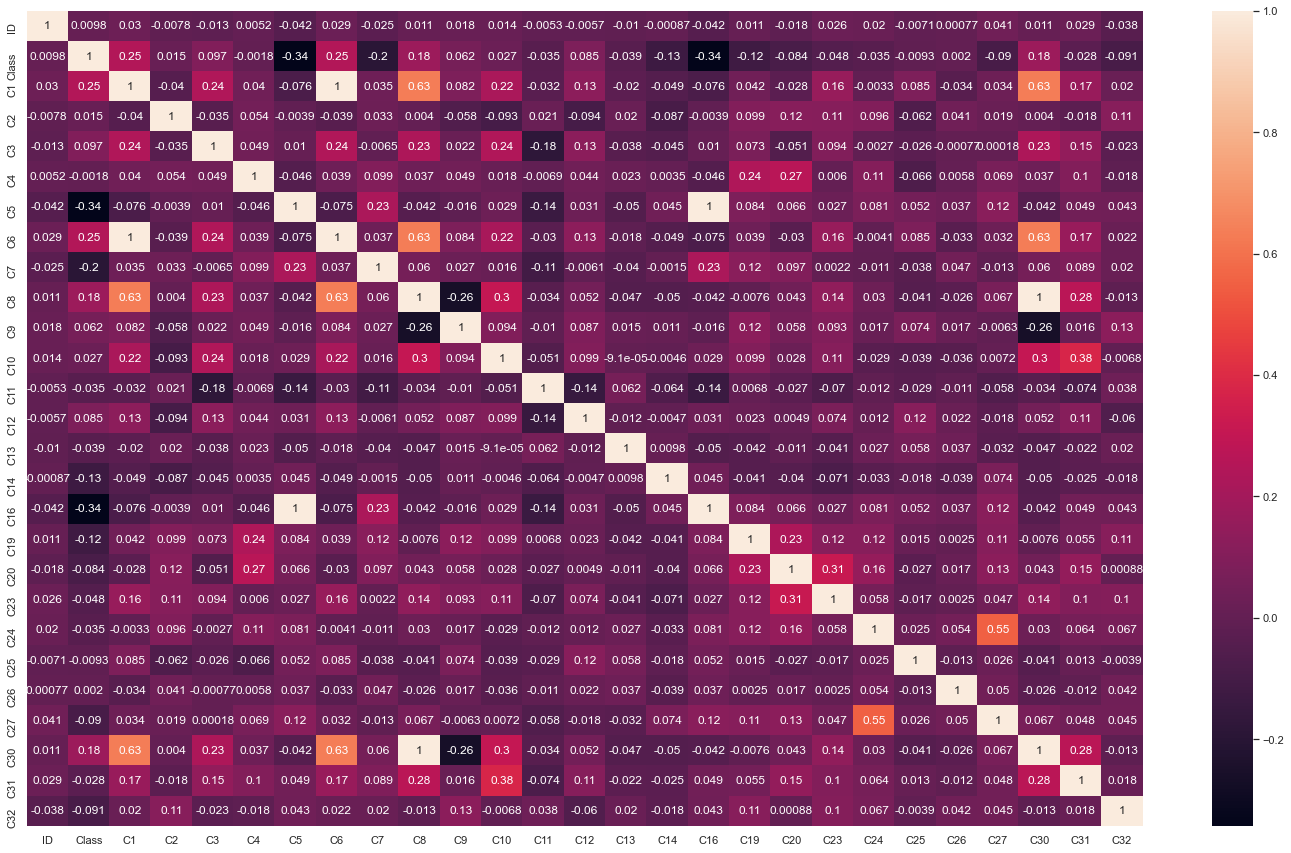

In [134]:
import seaborn as sns
sns.set(rc={'figure.figsize':(25,15)})

sns.heatmap(data.corr(), annot=True)

In [135]:
from sklearn.model_selection import train_test_split

train_data = data.iloc[:1000,:]
validation_data = data.iloc[1000:,:]

x = train_data.iloc[:,2:]
y = train_data.iloc[:,1]

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42, test_size=0.3)

In [136]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svm =SVC(kernel='linear', C=0.8)
svm.fit(x_train,y_train.values.flatten())
y_pred = svm.predict(x_test)

score = accuracy_score(y_test,y_pred)
print(score)

cm = confusion_matrix(y_test, y_pred)
print(cm)

report = classification_report(y_test,y_pred)
print(report)

0.7233333333333334
[[205  12]
 [ 71  12]]
              precision    recall  f1-score   support

         0.0       0.74      0.94      0.83       217
         1.0       0.50      0.14      0.22        83

    accuracy                           0.72       300
   macro avg       0.62      0.54      0.53       300
weighted avg       0.68      0.72      0.66       300



In [138]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)
score = accuracy_score(y_test,y_pred)
print(score)

cm = confusion_matrix(y_test, y_pred)
print(cm)

report = classification_report(y_test,y_pred)
print(report)

0.7266666666666667
[[194  23]
 [ 59  24]]
              precision    recall  f1-score   support

         0.0       0.77      0.89      0.83       217
         1.0       0.51      0.29      0.37        83

    accuracy                           0.73       300
   macro avg       0.64      0.59      0.60       300
weighted avg       0.70      0.73      0.70       300



In [139]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)
score = accuracy_score(y_test,y_pred)
print(score)

cm = confusion_matrix(y_test, y_pred)
print(cm)

report = classification_report(y_test,y_pred)
print(report)

0.7533333333333333
[[180  37]
 [ 37  46]]
              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83       217
         1.0       0.55      0.55      0.55        83

    accuracy                           0.75       300
   macro avg       0.69      0.69      0.69       300
weighted avg       0.75      0.75      0.75       300



In [140]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, x_test, y_test, cv=10)

array([0.7       , 0.73333333, 0.76666667, 0.8       , 0.56666667,
       0.8       , 0.63333333, 0.6       , 0.66666667, 0.6       ])

In [142]:
validation_data['C1'].fillna(validation_data.C1.mean(),inplace=True)
validation_data['C2'].fillna(validation_data.C2.mean(),inplace=True)
x_val = validation_data.iloc[:,2:]
print(x_val.info())
print(x_test.info())
output = clf.predict(x_val)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 1000 to 1099
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C1      100 non-null    float64
 1   C2      100 non-null    float64
 2   C3      100 non-null    int32  
 3   C4      100 non-null    int64  
 4   C5      100 non-null    int32  
 5   C6      100 non-null    int64  
 6   C7      100 non-null    int32  
 7   C8      100 non-null    int64  
 8   C9      100 non-null    int64  
 9   C10     100 non-null    int32  
 10  C11     100 non-null    int32  
 11  C12     100 non-null    int32  
 12  C13     100 non-null    int64  
 13  C14     100 non-null    int32  
 14  C16     100 non-null    int32  
 15  C19     100 non-null    int32  
 16  C20     100 non-null    int64  
 17  C23     100 non-null    int32  
 18  C24     100 non-null    int64  
 19  C25     100 non-null    int32  
 20  C26     100 non-null    int64  
 21  C27     100 non-null    int32  
 22

In [143]:
print(output)

[0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0.
 0. 1. 0. 0.]
